In [1]:
import pandas as pd
import numpy as np
import sklearn
import numpy
import seaborn as sns

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

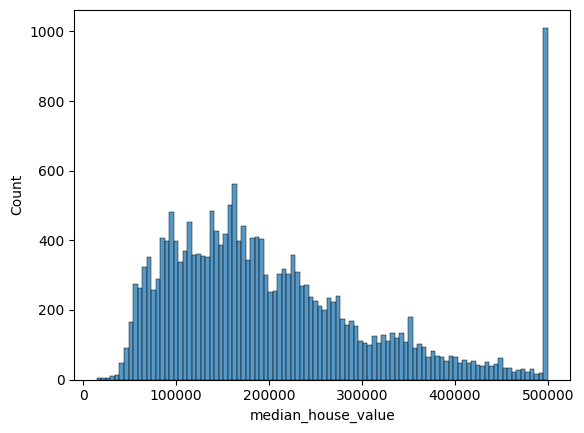

In [4]:
sns.histplot(data["median_house_value"], bins=100)

In [5]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
data_filtered = data[['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']]
data_filtered.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


### Question 1

Find a feature with missing values. How many missing values does it have?

In [7]:
data_filtered.columns.values[np.isnan(data_filtered.values).any(0).argmax()]

'total_bedrooms'

In [8]:
sum(np.isnan(data_filtered["total_bedrooms"].values))

207

### Question 2

What’s the median (50% percentile) for variable ‘population’?

In [9]:
data_filtered["population"].median()

1166.0

### Splitting

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value (‘median_house_value’) is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.


In [10]:
np.random.seed(42)

n = len(data_filtered)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [11]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [12]:
assert n == n_val + n_test + n_train

In [13]:
idx = np.arange(n)
np.random.shuffle(idx)

In [14]:
df_train = data_filtered.iloc[idx[:n_train]]
df_val = data_filtered.iloc[idx[n_train:n_train+n_val]]
df_test = data_filtered.iloc[idx[n_train+n_val:]]

In [15]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [16]:
y_train = np.log1p(df_train["median_house_value"].values)
y_val = np.log1p(df_val["median_house_value"].values)
y_test = np.log1p(df_test["median_house_value"].values)

In [17]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [18]:
len(y_train)

12384

<AxesSubplot:ylabel='Count'>

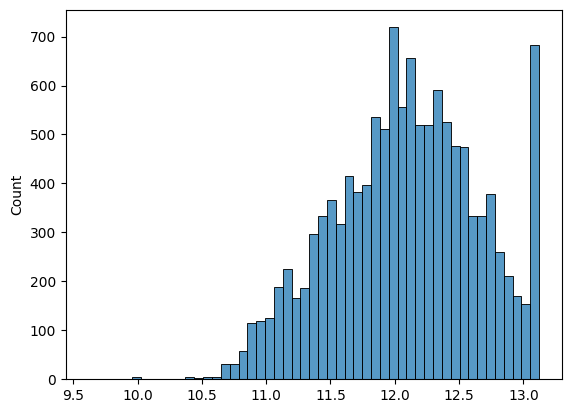

In [19]:
sns.histplot(y_train)

### Question 3


- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)
- Which option gives better RMSE?


In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [21]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [22]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [27]:
# df_val.values()
sum(np.isnan(df_val["total_bedrooms"].values))

0

In [28]:
df_train_zero = df_train.copy()
df_val_zero = df_val.copy()
df_train_zero["total_bedrooms"] = df_train["total_bedrooms"].fillna(0)
df_val_zero["total_bedrooms"] = df_val["total_bedrooms"].fillna(0)

In [29]:
df_train_mean = df_train.copy()
df_val_mean = df_val.copy()
mean_val = df_train["total_bedrooms"].mean()
df_train_mean["total_bedrooms"] = df_train["total_bedrooms"].fillna(mean_val)
df_val_mean["total_bedrooms"] = df_val["total_bedrooms"].fillna(mean_val)

524.5631459948321

In [30]:
w0_zero, w_zero = train_linear_regression(df_train_zero.values, y_train)
print(w0_zero, w_zero)
y_pred_zero = w0_zero + df_val_zero.dot(w_zero)
rmse(y_val, y_pred_zero)

-11.686975241767284 [-2.76255120e-01 -2.82087184e-01  2.91329621e-03 -8.64531514e-06
  1.50811922e-04 -2.08205659e-04  5.69546573e-04  1.71308139e-01]


0.3295330365231164

In [31]:
w0_mean, w_mean = train_linear_regression(df_train_mean.values, y_train)
print(w0_mean, w_mean)
y_pred_mean = w0_mean + df_val_mean.dot(w_mean)
rmse(y_val, y_pred_mean)

-11.75959087273449 [-2.76809637e-01 -2.82182103e-01  2.93033801e-03 -1.48543785e-05
  2.48054046e-04 -2.03763456e-04  4.87004092e-04  1.73086593e-01]


0.3290195439003144

### Question 4

- Now let’s train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

In [38]:
r = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [39]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [47]:
score_list = []
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    w0, w = train_linear_regression_reg(df_train_zero, y_train, r=r)

    y_pred = w0 + df_val_zero.values.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, np.round(score,2))
    # score_list.append(score)

0.0 -11.686975241767284 0.33
1e-05 -11.686814584493742 0.33
0.0001 -11.68536886523559 0.33
0.001 -11.67093131805209 0.33
0.1 -10.274500282172767 0.33
1 -4.920480897792145 0.33
10 -0.7899311832286899 0.34


### Question 5

- We used seed 42 for splitting the data. Let’s find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What’s the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))


In [77]:
def expirement(seed):

    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = data_filtered.iloc[idx[:n_train]]
    df_val = data_filtered.iloc[idx[n_train:n_train+n_val]]
    df_test = data_filtered.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train["median_house_value"].values)
    y_val = np.log1p(df_val["median_house_value"].values)
    y_test = np.log1p(df_test["median_house_value"].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    df_train_zero = df_train.copy()
    df_val_zero = df_val.copy()
    df_train_zero["total_bedrooms"] = df_train["total_bedrooms"].fillna(0)
    df_val_zero["total_bedrooms"] = df_val["total_bedrooms"].fillna(0)

    w0_zero, w_zero = train_linear_regression(df_train_zero.values, y_train)
    y_pred_zero = w0_zero + df_val_zero.dot(w_zero)
    score = rmse(y_val, y_pred_zero)
    print(f"seed = {seed}. rmse = {np.round(score,3)}")
    return score

In [78]:
np.round(np.std([np.round(expirement(i), 3) for i in range(10)]),3)

seed = 0. rmse = 0.339
seed = 1. rmse = 0.336
seed = 2. rmse = 0.332
seed = 3. rmse = 0.341
seed = 4. rmse = 0.339
seed = 5. rmse = 0.343
seed = 6. rmse = 0.345
seed = 7. rmse = 0.34
seed = 8. rmse = 0.347
seed = 9. rmse = 0.337


0.004

### Question 6

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.
- What’s the RMSE on the test dataset?

In [76]:
def expirement_regularization(seed):

    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_train = data_filtered.iloc[idx[:n_train]]
    df_val = data_filtered.iloc[idx[n_train:n_train+n_val]]
    df_test = data_filtered.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train["median_house_value"].values)
    y_val = np.log1p(df_val["median_house_value"].values)
    y_test = np.log1p(df_test["median_house_value"].values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    df_train_zero = df_train.copy()
    df_val_zero = df_val.copy()
    df_test_zero = df_test.copy()
    df_train_zero["total_bedrooms"] = df_train["total_bedrooms"].fillna(0)
    df_val_zero["total_bedrooms"] = df_val["total_bedrooms"].fillna(0)
    df_test_zero["total_bedrooms"] = df_test["total_bedrooms"].fillna(0)

    print(df_train_zero.shape, df_val_zero.shape)
    df_train_zero = pd.concat([df_train_zero,df_val_zero])
    print(df_train_zero.shape)
    y_train = np.hstack([y_train, y_val])
    print(y_train.shape)
    w0_zero, w_zero = train_linear_regression_reg(df_train_zero.values, y_train, 0.001)
    y_pred_zero = w0_zero + df_val_zero.dot(w_zero)
    score = rmse(y_val, y_pred_zero)
    print(f"seed = {seed}. rmse = {np.round(score,3)}")
    y_pred_zero = w0_zero + df_test_zero.dot(w_zero)
    score = rmse(y_test, y_pred_zero)
    print(f"test_dataset rmse {score}")
    return score
expirement_regularization(9)

(12384, 8) (4128, 8)
(16512, 8)
(16512,)
seed = 9. rmse = 0.336
test_dataset rmse 0.3453168914370831


0.3453168914370831